In [1]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
df = sns.load_dataset('tips') # подгрузим для примера датасет аварий
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


# Categorical plots
Визуализация категориальных данных:  
- частота (frequency)
- количество (нормированное и нет)
- сумма
- среднее
- и тд

## Barplot

In [5]:
df = sns.load_dataset('tips') # воспользуемся датасетом с чаевыми
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot: xlabel='sex', ylabel='total_bill'>

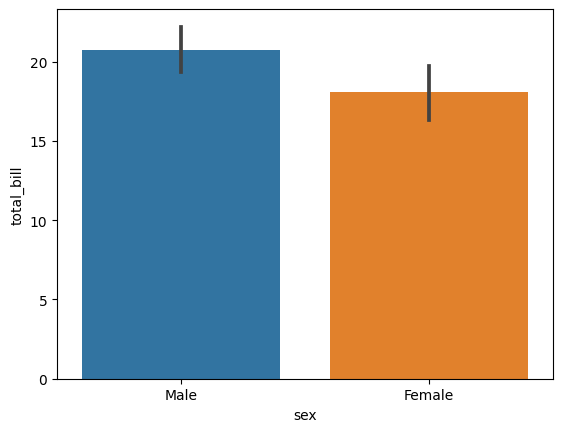

In [6]:
sns.barplot(data=df, x='sex', y='total_bill') # обычный барплот

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

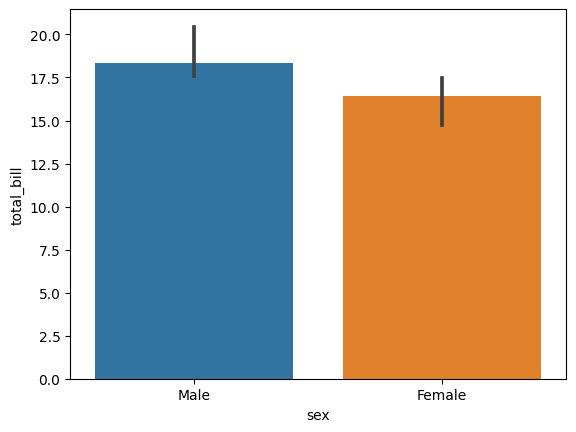

In [7]:
sns.barplot(data=df, x='sex', y='total_bill',
                estimator=np.median) # по-умолчанию barplot считает среднее. можно поставить другую функцию для применения к столбцу (агрегации)

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

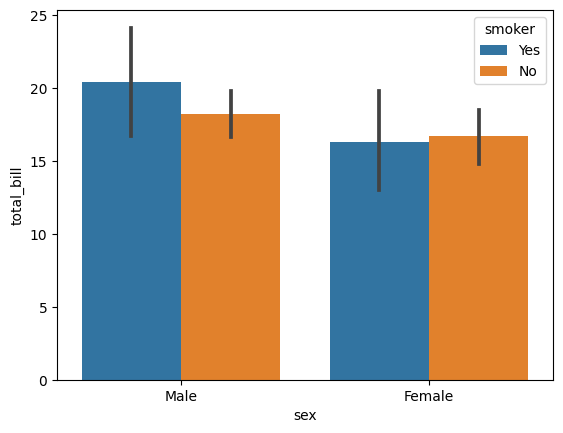

In [8]:
sns.barplot(data=df, x='sex', y='total_bill',
                estimator=np.median,
                hue='smoker') # разбивка по бинарной категории

# можно ли сказать, что курящие оставляют больше чаевых? (смотря на график)
# как справедливо проверить эту информацию?

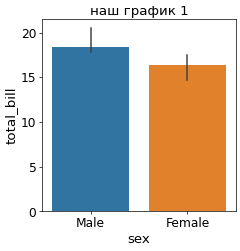

In [9]:
# seaborn -- обертка вокруг matplotlib

plt.figure(figsize=(5, 5), dpi=50) # matplotlib

sns.set_context('paper', font_scale=2) # seaborn
sns.barplot(data=df, x='sex', y='total_bill', estimator=np.median) # seaborn

plt.title('наш график 1')
plt.show()

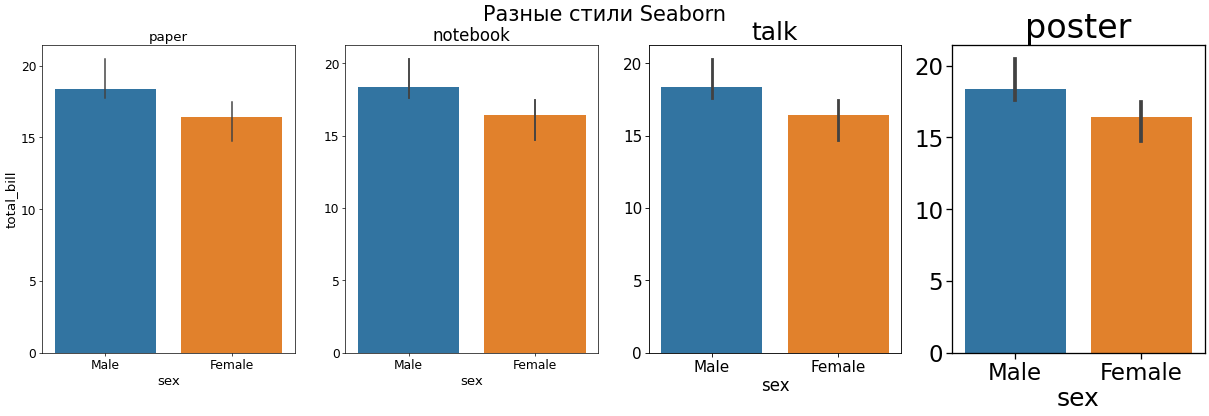

In [10]:
# seaborn -- обертка вокруг matplotlib

plt.figure(figsize=(30, 8), dpi=50) # matplotlib

plt.subplot(1, 4, 1)
plt.title('paper')

sns.set_context('paper', font_scale=2) # seaborn
sns.barplot(data=df, x='sex', y='total_bill', estimator=np.median) # seaborn

plt.subplot(1, 4, 2)
sns.set_context('notebook', font_scale=2)
plt.title('notebook')
sns.barplot(data=df, x='sex', y='total_bill', estimator=np.median)
plt.ylabel("") # уберем подпись оси

plt.subplot(1, 4, 3)
sns.set_context('talk', font_scale=2)
plt.title('talk')
sns.barplot(data=df, x='sex', y='total_bill', estimator=np.median)
plt.ylabel("")

plt.subplot(1, 4, 4)
sns.set_context('poster', font_scale=2)
plt.title('poster')
sns.barplot(data=df, x='sex', y='total_bill', estimator=np.median)
plt.ylabel("")

plt.suptitle("Разные стили Seaborn", fontsize=30) # общее название


plt.show()

In [11]:
sns.set_context('notebook', font_scale=1) # оставим пресет notebook

## Countplot

<AxesSubplot: xlabel='day', ylabel='count'>

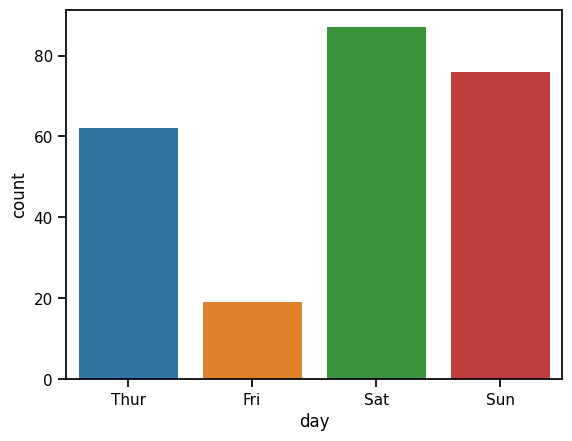

In [12]:
sns.countplot(data=df, x='day') # это просто barplot с count в качестве estimator

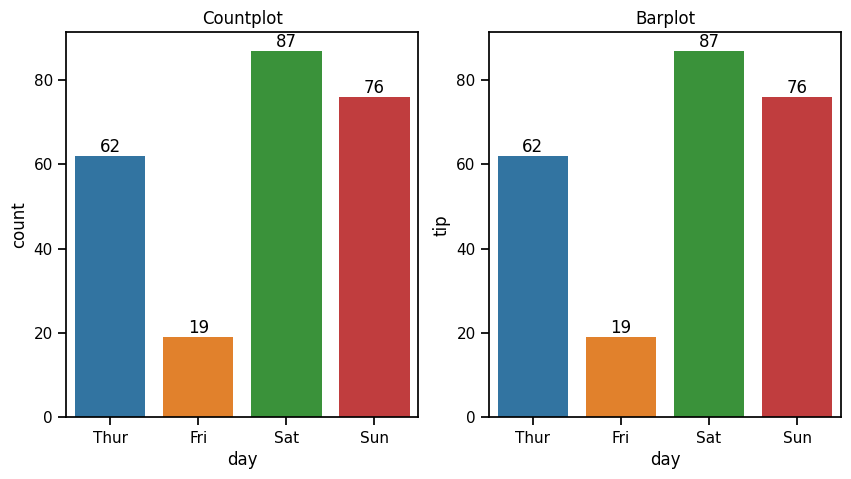

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Countplot")
ax = sns.countplot(data=df, x='day')
for i in ax.containers: # чтобы нарисовать подписи
    ax.bar_label(i,)

plt.subplot(1, 2, 2)
plt.title("Barplot")
ax = sns.barplot(data=df, x='day', y='tip', estimator=len) # то же, что и выше)

for i in ax.containers:
    ax.bar_label(i,)

## Boxplot

In [14]:
df.head(1) # вспомним, как выглядит датафрейм

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


<AxesSubplot: xlabel='day', ylabel='tip'>

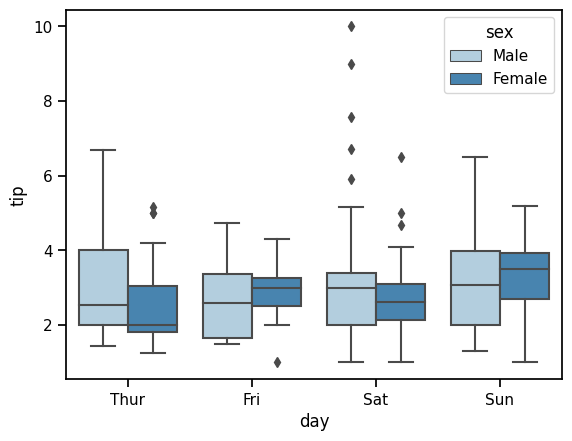

In [15]:
sns.boxplot(data=df, x='day', y='tip', hue='sex', palette='Blues')

<AxesSubplot: xlabel='smoker', ylabel='tip'>

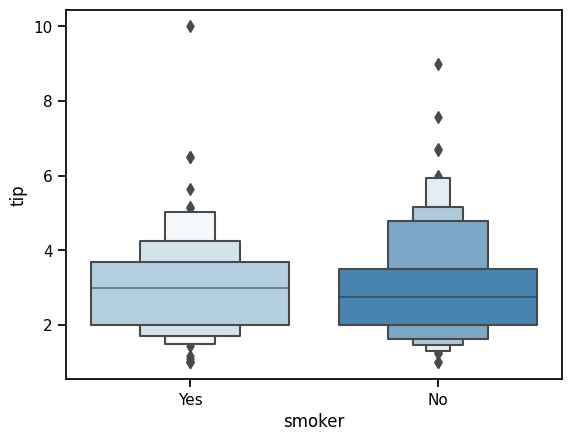

In [16]:
sns.boxenplot(data=df, x='smoker', y='tip', palette='Blues') # если данных много # каждый раз отсекается половина от оставшихся данных

# 25%
# 12.5%
# 6.25%
# и тд

## Violin plot

<AxesSubplot: xlabel='day', ylabel='tip'>

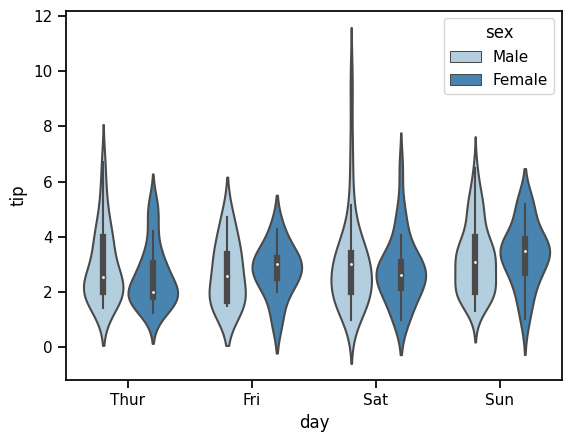

In [17]:
sns.violinplot(data=df, x='day', y='tip', hue='sex', palette='Blues')

<AxesSubplot: xlabel='day', ylabel='tip'>

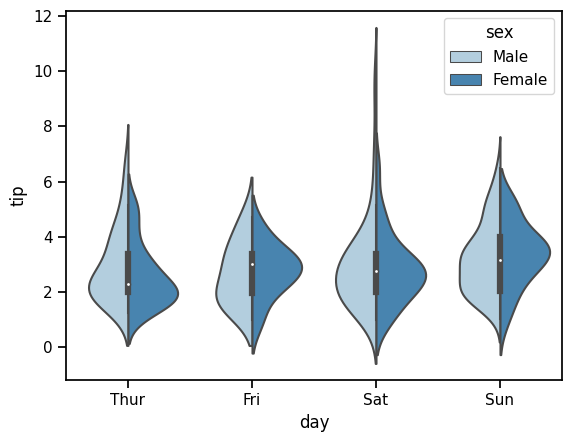

In [18]:
sns.violinplot(data=df, x='day', y='tip', hue='sex', palette='Blues', split=True )

## Strip plot

<AxesSubplot: xlabel='day', ylabel='tip'>

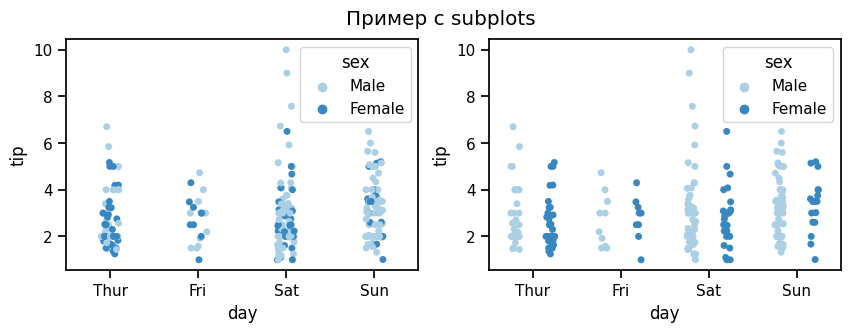

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

plt.suptitle("Пример с subplots")

sns.stripplot(data=df, x='day', y='tip', hue='sex', dodge=False, palette='Blues', ax=ax[0]) # ax=ax[i]
sns.stripplot(data=df, x='day', y='tip', hue='sex', dodge=True, palette='Blues', ax=ax[1]) # ax=ax[i]

# Распределения

In [20]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [21]:
crash = sns.load_dataset('car_crashes')

In [22]:
crash.head(3)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ


C:\Users\igumn\AppData\Local\Temp\ipykernel_18952\999842384.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crash['speeding'])


<AxesSubplot: xlabel='speeding', ylabel='Density'>

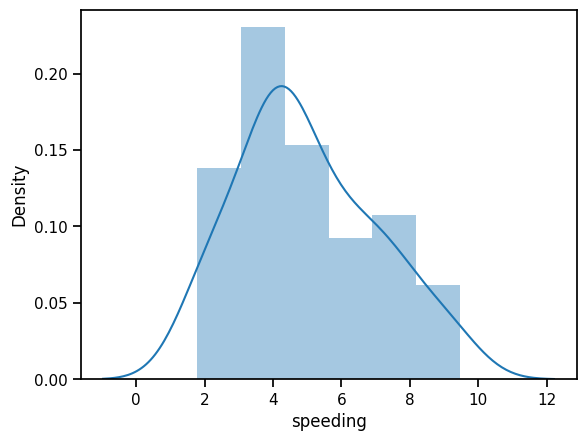

In [23]:
sns.distplot(crash['speeding'])

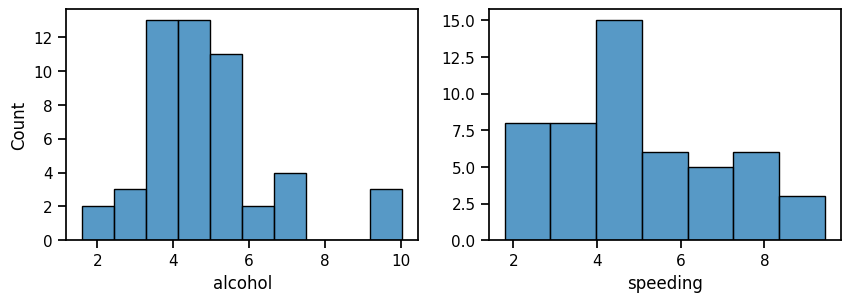

In [24]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.histplot(data=crash, x='alcohol')
plt.subplot(1, 2, 2)
sns.histplot(data=crash, x='speeding')

plt.ylabel("")
plt.show()

<AxesSubplot: xlabel='alcohol', ylabel='speeding'>

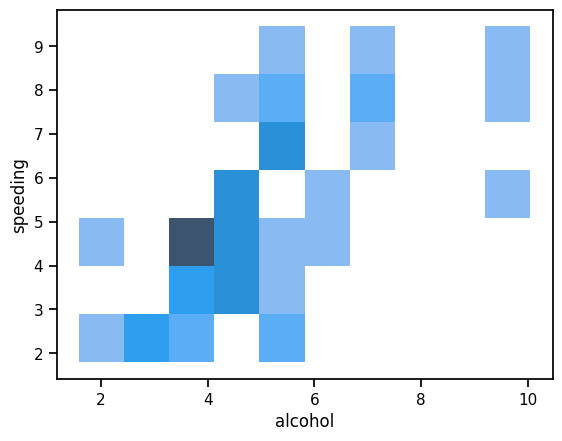

In [25]:
sns.histplot(data=crash, x='alcohol', y='speeding') # 2D распределение

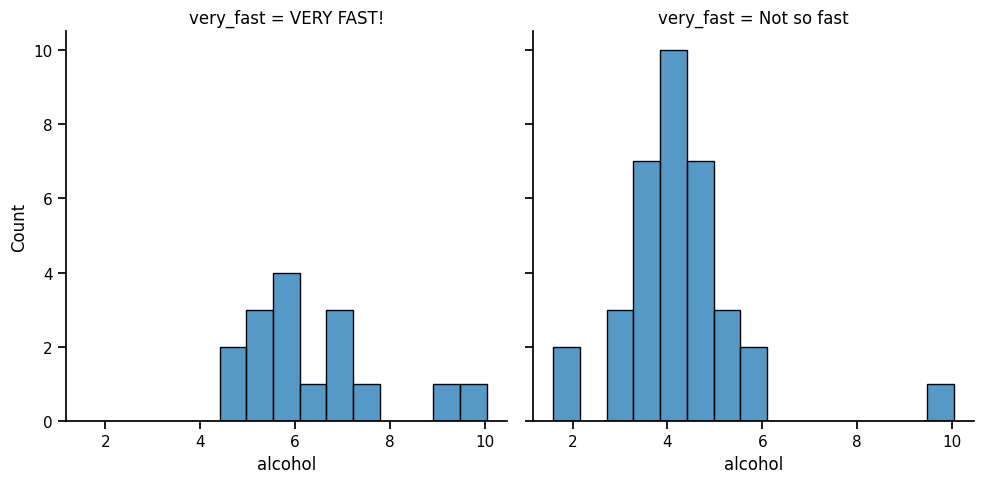

In [26]:
crash['very_fast'] = np.where(crash['speeding'] >= 6, 'VERY FAST!', 'Not so fast')

sns.displot(data=crash, x='alcohol', bins=15, col='very_fast')

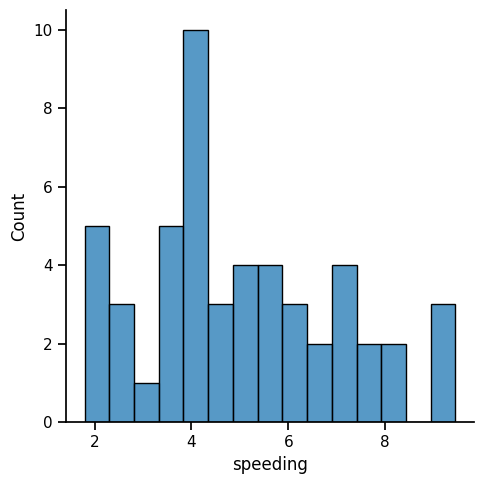

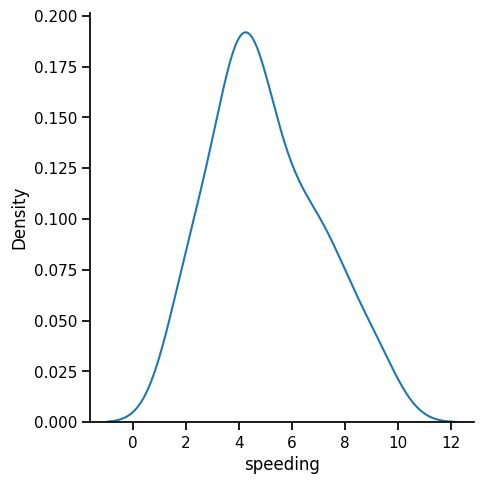

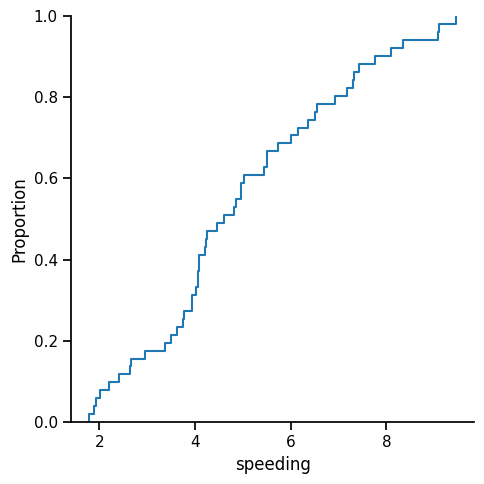

In [27]:
sns.displot(data=crash, x='speeding', bins=15, kind='hist')
sns.displot(data=crash, x='speeding', kind='kde')
sns.displot(data=crash, x='speeding', kind='ecdf')

## Joint plot

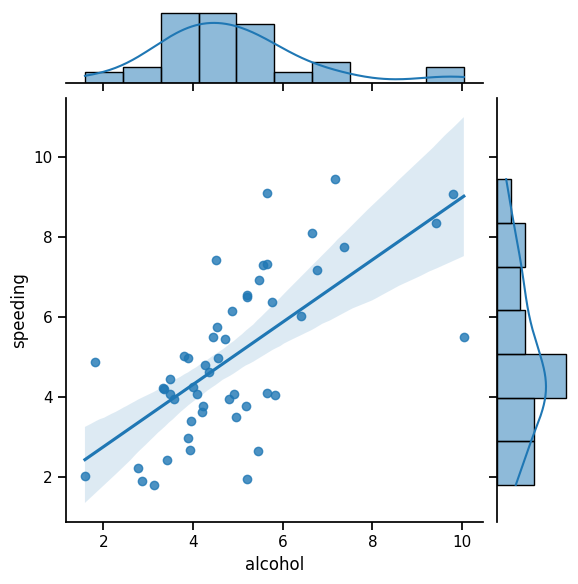

In [28]:
sns.jointplot(data=crash, x='alcohol', y='speeding', kind='reg') # два 1d и 2d распределение

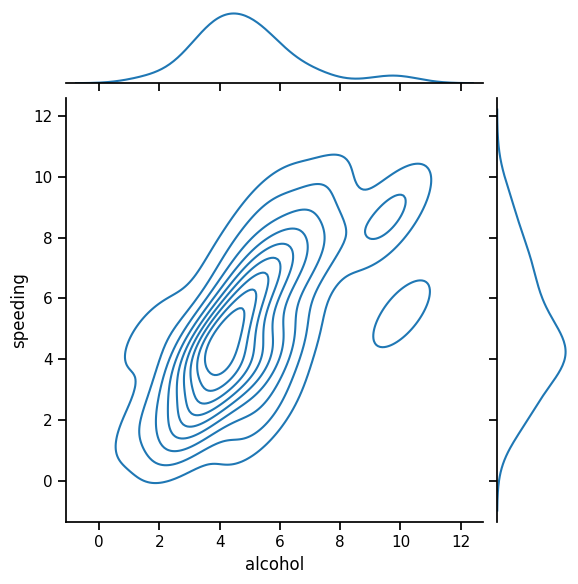

In [29]:
sns.jointplot(data=crash, x='alcohol', y='speeding', kind='kde') # если точек слишком много

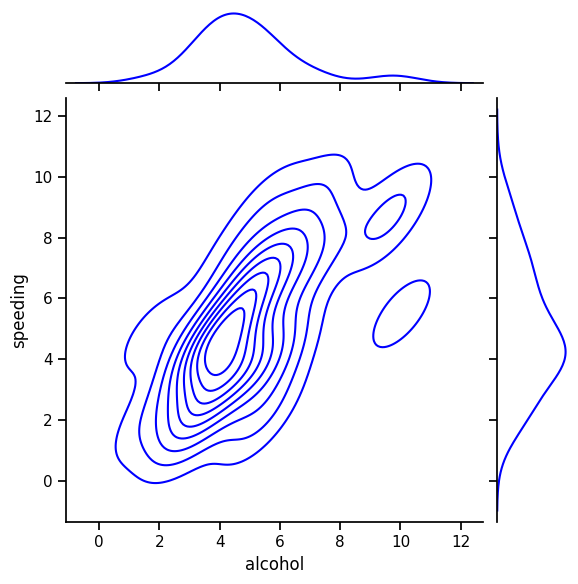

In [30]:
sns.jointplot(data=crash, x='alcohol', y='speeding', kind='kde', color='blue') # просто поменяем цвет :)

<AxesSubplot: xlabel='alcohol', ylabel='speeding'>

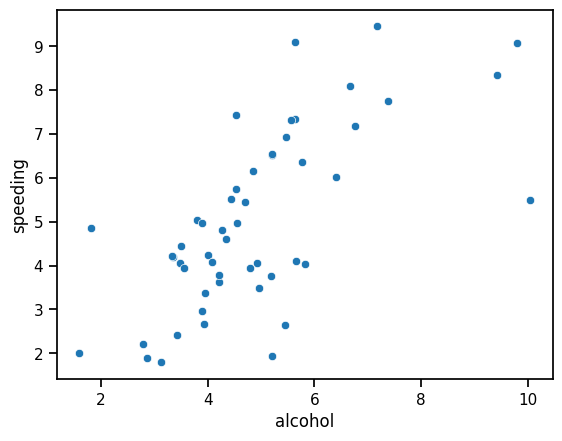

In [31]:
sns.scatterplot(data=crash, x='alcohol', y='speeding')

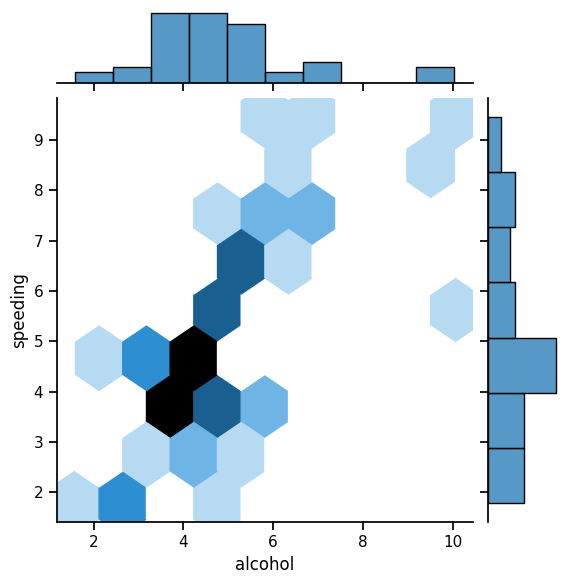

In [32]:
sns.jointplot(data=crash, x='alcohol', y='speeding', kind='hex')

## KDE plot

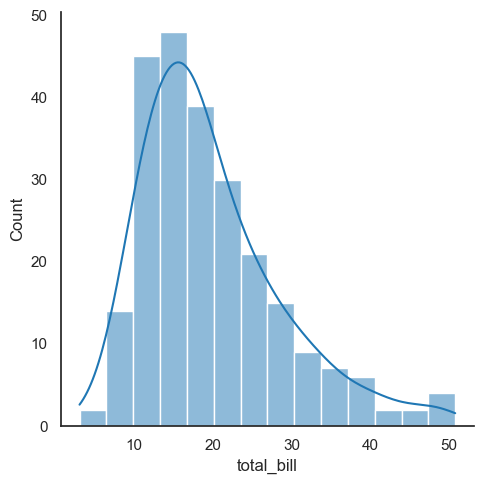

In [33]:
# displot 
# обратно в чаевым
sns.set_style('white')
sns.displot(data=df, x='total_bill', kde=True)

<AxesSubplot: xlabel='total_bill', ylabel='Density'>

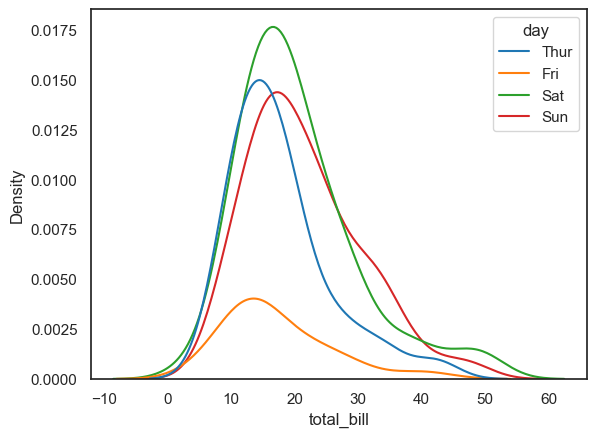

In [34]:
sns.kdeplot(data=df, x='total_bill', hue='day')

# Heatmap 

In [35]:
flights = sns.load_dataset('flights')
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [36]:
data = flights.groupby('year')['passengers'].sum()
type(data)

pandas.core.series.Series

In [37]:
data

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

<AxesSubplot: xlabel='year'>

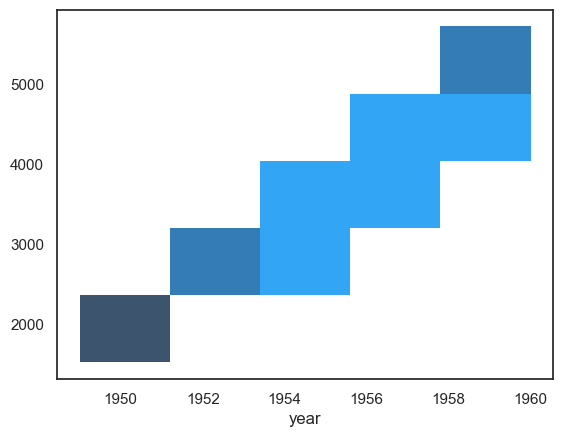

In [38]:
sns.histplot(x=data.index, y=data.values)

In [39]:
flights2 = flights.pivot(values='passengers', index='year', columns='month')

In [40]:
flights2

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot: xlabel='month', ylabel='year'>

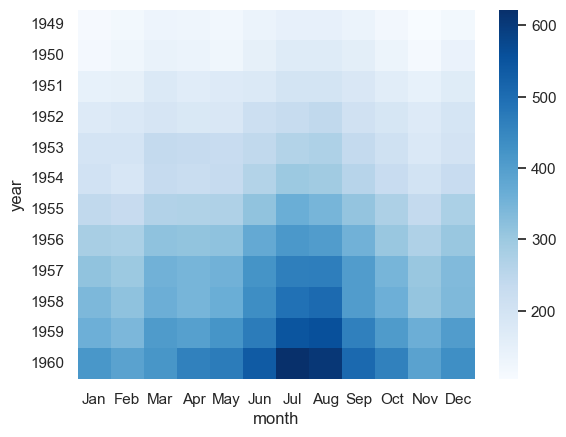

In [41]:
sns.heatmap(flights2, cmap='Blues')

<AxesSubplot: xlabel='month', ylabel='year'>

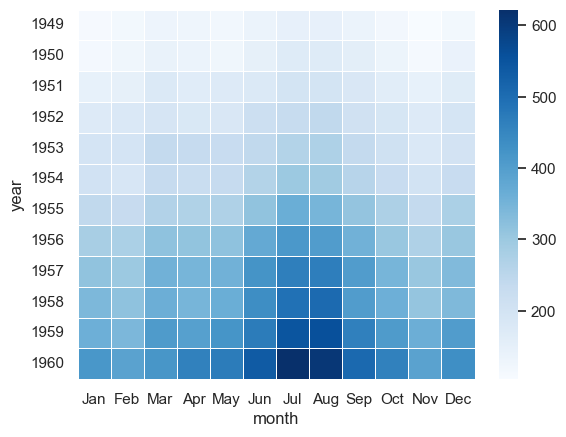

In [42]:
sns.heatmap(flights2, cmap='Blues', linecolor='white', linewidth=0.5)

# Cluster map

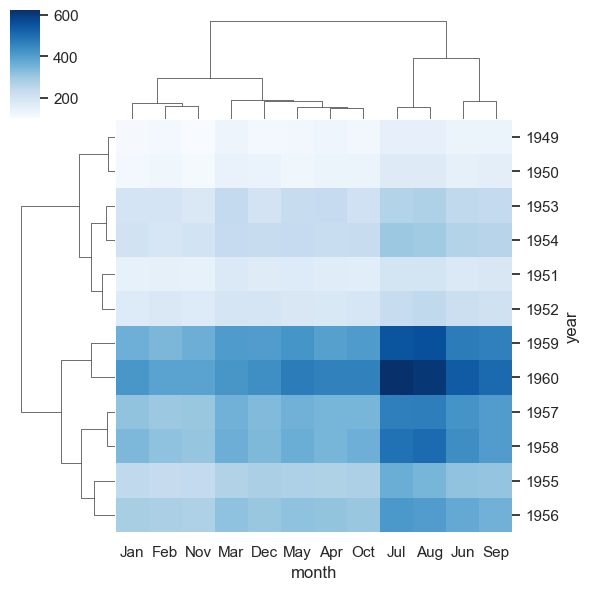

In [43]:
sns.clustermap(flights2, cmap='Blues', figsize=(6, 6))
plt.show()

# Практика

In [44]:
data = sns.load_dataset('penguins') # датасет про пингвинов

In [45]:
data.head() # flipper -- плавник, bill -- клюв

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


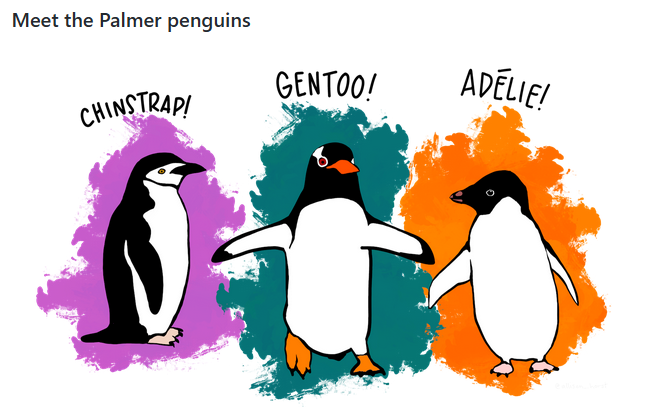

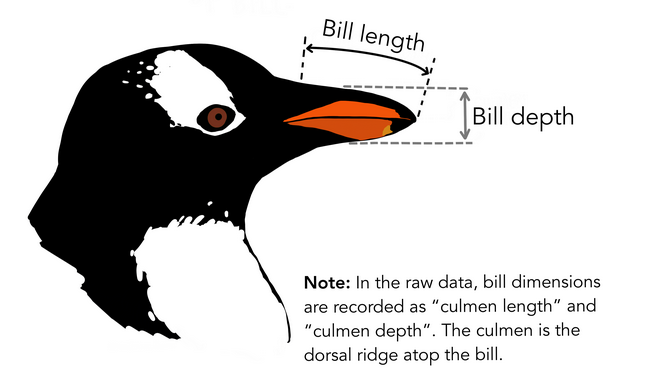

In [46]:
data.head(2) # flipper -- плавник, bill -- клюв

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


In [47]:
# постройке scatterplot для зависимости body mass от flipper length


In [48]:
# сделайте так, чтобы в вашем scatterplot три вида были окрашены в разный цвет


In [49]:
# а теперь сделайте, чтоб они еще были разной формы (то есть разная форма точек)

In [50]:
# постройте частотную гистограмму для flipper length


In [51]:
# посмотрите, есть ли дисбаланс классов? сколько пингвинов каждого вида?
# кажется, число немного разное. если они сильно разное, то данные стоит нормировать
# постройте гистограмму, которая будет показывать не сырые counts, а, например, проценты
# (посмотрите, какие есть варианты у функции визуализации)


In [52]:
# зайдите в галерею сибор или матплотлиб и выберите для себя палитру, которая вам нравится
# постройте 2D распределение для bill_length_mm и bill_depth_mm (joint plot)


In [53]:
# постройте 2D histplot для этих же двух столбцов


In [54]:
# постройте боксплот body_mass_g и разбейте его по трём видам


In [55]:
# каждый вид разбейте также на Male и Female особей


In [56]:
# посчитайте для каждого вида (отдельно для мальчиков и девочек) среднее значение для каждого столбца
